# Exemplo de Regressão Linear

O foco é avaliar o limite do empréstimo para alguém que possui um salário X

## Lendo os dados do modelo

In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

In [2]:
data = pd.read_excel('BaseDados_RegressaoLogistica.xlsx', 'Plan1')
data

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
0,1,10480,1,2,1
1,2,6182,2,2,1
2,3,6387,3,1,0
3,4,6528,1,2,0
4,5,8269,1,2,0
...,...,...,...,...,...
95,96,3238,1,2,0
96,97,10701,1,2,1
97,98,14732,1,2,0
98,99,4790,1,2,1


Entendendo as variáveis:

Tipo de Renda = Var. Categórica \
1 = Assalariado \
2 = Autônomo \
3 = Empresário 

Possui Imóvel = Var. Categórica \
1 = Sim \
2 = Não 

Comprou? = Var. Categórica \
1 = Comprou \
0 = Não Comprou 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id Cliente     100 non-null    int64
 1   Renda          100 non-null    int64
 2   Tipo Renda     100 non-null    int64
 3   Possui Imóvel  100 non-null    int64
 4   Comprou?       100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


In [4]:
data.describe()

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
count,100.000000,100.00000,100.000000,100.00000,100.000000
mean,50.500000,8520.77000,1.400000,1.85000,0.640000
std,29.011492,4039.01965,0.710669,0.35887,0.482418
min,1.000000,1643.00000,1.000000,1.00000,0.000000
25%,25.750000,5455.25000,1.000000,2.00000,0.000000
50%,50.500000,8824.00000,1.000000,2.00000,1.000000
75%,75.250000,12036.00000,2.000000,2.00000,1.000000
max,100.000000,14994.00000,3.000000,2.00000,1.000000


## Análise Exploratória

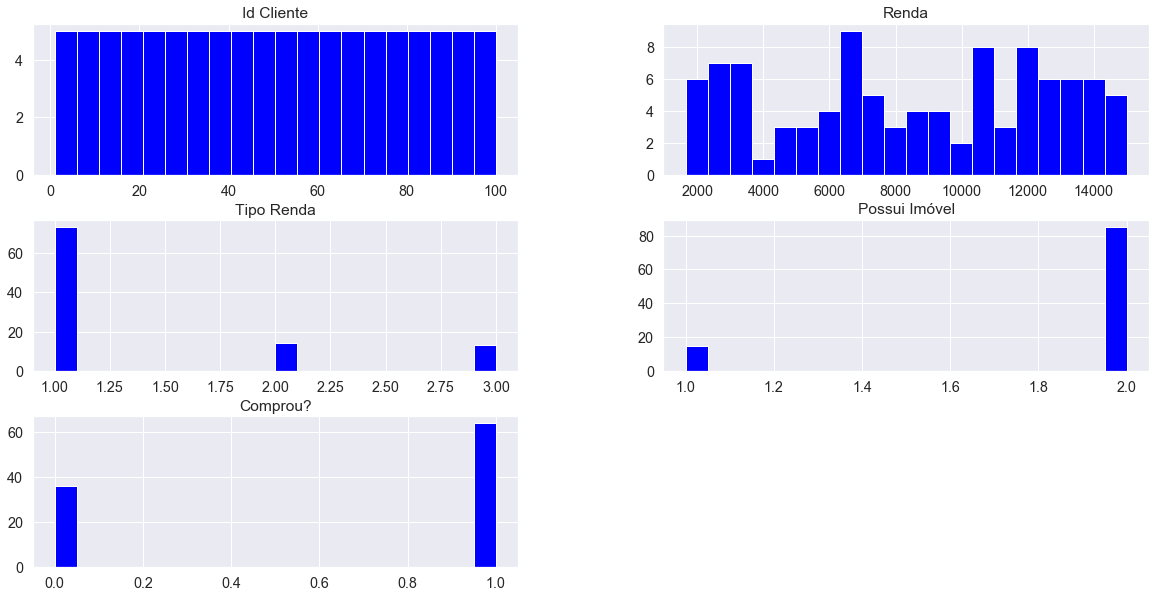

In [7]:
sns.set( font_scale=1.3, rc={ 'figure.figsize':(20,10) } )
eixo = data.hist( bins=20, color='blue' )

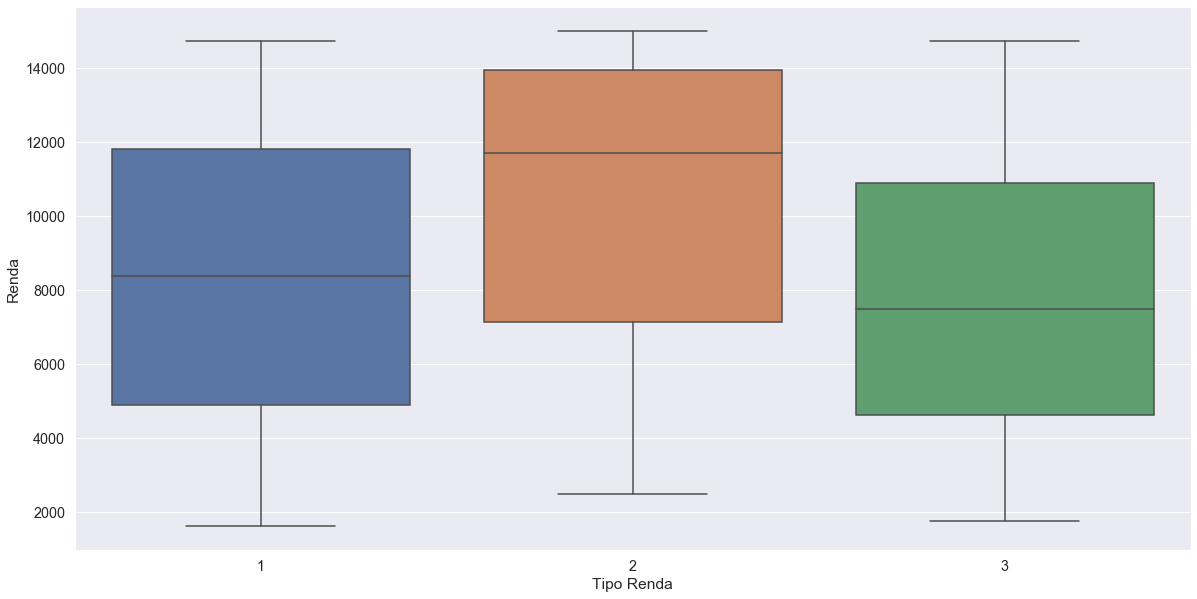

In [9]:
plt.figure( figsize=(20,10) )
sns.boxplot( data=data, x='Tipo Renda', y='Renda' );

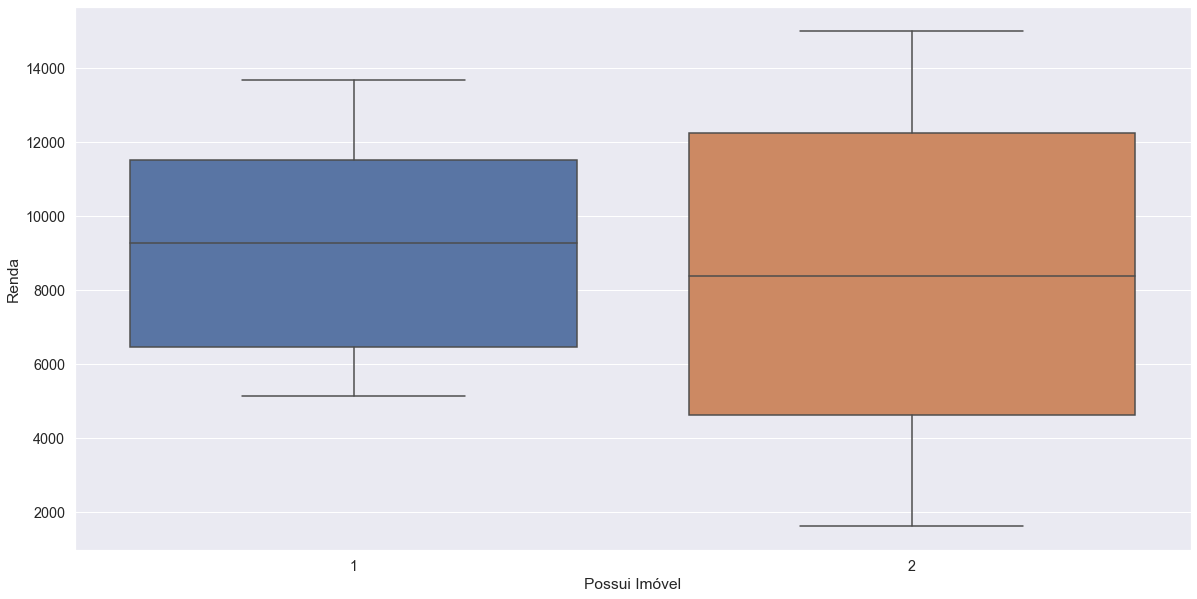

In [10]:
plt.figure( figsize=(20,10) )
sns.boxplot( data=data, x='Possui Imóvel', y='Renda' );

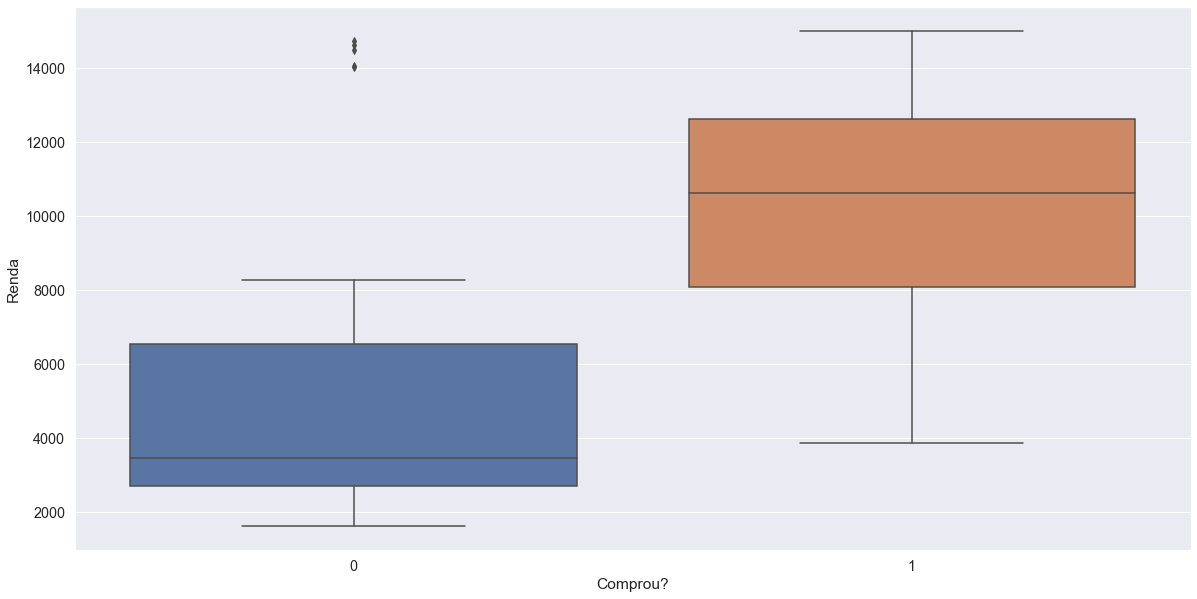

In [12]:
plt.figure( figsize=(20,10) )
sns.boxplot( data=data, x='Comprou?', y='Renda' );

Há um padrão para esse caso, quem comprou imóvel tende a possuir uma renda maior

Pode ser também observado alguns outliers no grupo de pessoas que não comprou imóvel e tem uma renda muito alta

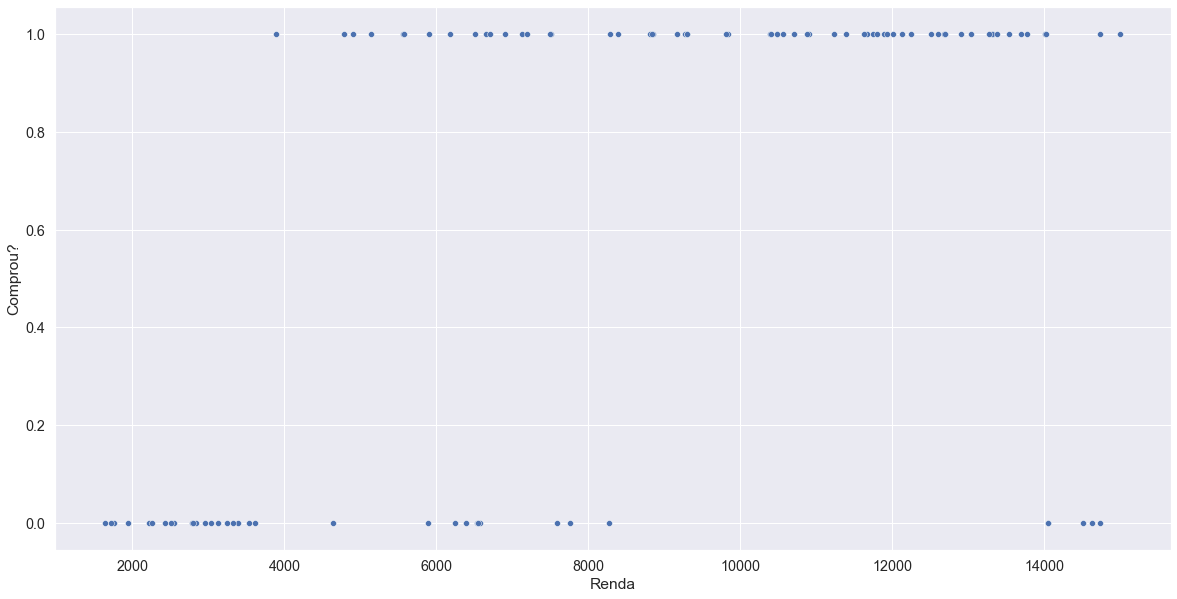

In [14]:
plt.figure( figsize=(20,10) )
sns.scatterplot(data=data, x='Renda', y='Comprou?');

É fáicl observar que dá para usar um modelo de regressão logística para avaliar o problema

## Separando os dados em Treino e Testes

In [48]:
Característica = data.iloc[:, 1:4].values
Previsor = data.iloc[:, 4:5].values

In [49]:
Característica[:10]

array([[10480,     1,     2],
       [ 6182,     2,     2],
       [ 6387,     3,     1],
       [ 6528,     1,     2],
       [ 8269,     1,     2],
       [ 6903,     1,     2],
       [ 1947,     1,     2],
       [14008,     1,     2],
       [ 2213,     1,     2],
       [13321,     2,     2]], dtype=int64)

In [50]:
Previsor[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1]], dtype=int64)

In [51]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(Característica, Previsor, test_size =0.20, random_state = 10) # 20% dos dados ficaram para teste e 80% para treino

In [52]:
len(x_treino), len(x_teste)

(80, 20)

## Treinando o Modelo

In [53]:
from sklearn.linear_model import LogisticRegression

reglog = LogisticRegression()
reglog.fit( x_treino, y_treino.ravel() )

LogisticRegression()

In [54]:
Previsoes = reglog.predict(x_teste)
Previsoes

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1],
      dtype=int64)

In [55]:
# y_teste.reshape(1,-1)
y_teste.ravel()

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1],
      dtype=int64)

## Avaliando o Desempenho do Modelo

In [56]:
from sklearn.metrics import confusion_matrix

confusion_matrix( y_teste, Previsoes )

array([[ 6,  2],
       [ 1, 11]], dtype=int64)

In [57]:
from sklearn.metrics import classification_report

print( classification_report( y_teste, Previsoes ) )

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.85      0.92      0.88        12

    accuracy                           0.85        20
   macro avg       0.85      0.83      0.84        20
weighted avg       0.85      0.85      0.85        20



## Testando Novos Valores

In [58]:
# Novo Cliente na Tenda
Salario = 4500
Tipo_Renda = 1
Possui_Imovel = 1

Parametro = [[Salario, Tipo_Renda, Possui_Imovel]]
Fazendo_Previsao = reglog.predict(Parametro)
Probabilidade = reglog.predict_proba(Parametro)

if Fazendo_Previsao == 0:
    print("Não ira comprar")
    print("Este cliente possui %.3f chance de não comprar e %.3f chance de comprar." %(Probabilidade[0][0], Probabilidade[0][1]))
    print( Probabilidade )
else:
    print("Irá comprar!!!")
    print("Este cliente possui %.3f chance de não comprar e %.3f chance de comprar." %(Probabilidade[0][0], Probabilidade[0][1]))
    print( Probabilidade )

Irá comprar!!!
Este cliente possui 0.455 chance de não comprar e 0.545 chance de comprar.
[[0.45486011 0.54513989]]
